In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [41]:
def swiss_roll(n):
    """
    Parameters:
    n: int
        Number of points to generate"""
    
    data = np.zeros((n,3))
    phi = np.random.uniform(low=1.5*np.pi, high=4.5*np.pi, size=n)
    psi = np.random.uniform(0,10,n)
            
    data[:,0]=phi*np.cos(phi) #x coordinte
    data[:,1]=phi*np.sin(phi) #y coordinate
    data[:,2]=psi #z coordinate
    return data

<class 'matplotlib.axes._subplots.Axes3DSubplot'>


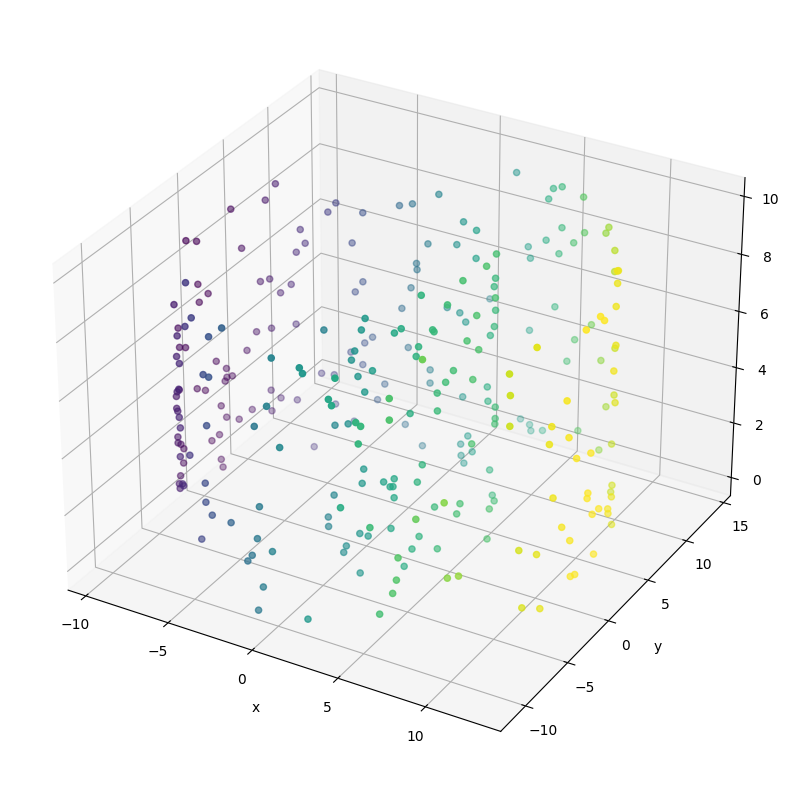

In [52]:
N = 300
X = swiss_roll(N)

plt.figure(figsize=(12,10))
axes = plt.axes(projection='3d')
print(type(axes))
axes.scatter3D(X[:,0], X[:,1], X[:,2], c=X[:,0])

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')

#axes.view_init(45, 45) #(elevation, azimuth angle)

plt.show()

In [53]:
print(X)
print(X.shape)

[[ 1.85019323e+00  7.37994637e+00  6.05987294e+00]
 [-6.91204168e+00 -7.57693211e+00  6.63830343e+00]
 [ 1.08937241e+01 -5.29800416e+00  8.01253862e+00]
 [ 1.15079305e+00 -4.81144828e+00  6.89592056e-01]
 [ 1.22739322e+01  3.87977183e+00  1.85579584e+00]
 [ 6.35131779e+00 -9.67842669e+00  7.56355535e+00]
 [-1.49132156e+00  7.90102518e+00  4.13497168e+00]
 [-7.59203614e+00 -6.73766748e+00  1.90867938e+00]
 [ 1.08577926e+01 -5.35823010e+00  8.73850726e+00]
 [-3.18214313e-01 -1.09619357e+01  9.54402030e-01]
 [ 6.64997052e+00 -9.51161041e+00  2.10800574e+00]
 [ 1.09219233e+01  7.33778890e+00  4.70981325e+00]
 [ 1.25486085e+01  2.19922442e+00  8.87287812e+00]
 [ 1.03547477e+01  8.24939400e+00  8.66594068e+00]
 [ 3.09752716e+00  6.74644564e+00  9.28267857e+00]
 [ 1.98632489e+00  7.32461255e+00  1.38555026e+00]
 [ 5.96069342e+00 -1.21178688e+00  1.94055848e+00]
 [-9.47727477e+00 -9.75317945e-01  8.77528480e+00]
 [ 1.13340521e+01 -4.48588654e+00  5.61281227e-01]
 [-6.33830183e-01 -1.09192115e+

In [54]:
from scipy.spatial.distance import pdist, squareform

sq_dists = pdist(X, "sqeuclidean")
#print(sq_dists)
#print(sq_dists.shape)

# Convert pairwise distances into a square distances-matrix
mat_sq_dists = squareform(sq_dists)
print(mat_sq_dists)
print(mat_sq_dists.shape)
print(mat_sq_dists.mean())

[[  0.         300.81955619 246.32878421 ... 112.639011   197.03025638
  135.60627668]
 [300.81955619   0.         324.1273315  ... 155.95701967  67.09739848
  116.85844178]
 [246.32878421 324.1273315    0.         ... 443.72397872 458.6938874
  463.46305512]
 ...
 [112.639011   155.95701967 443.72397872 ...   0.          68.19719801
   35.41852605]
 [197.03025638  67.09739848 458.6938874  ...  68.19719801   0.
   11.91873797]
 [135.60627668 116.85844178 463.46305512 ...  35.41852605  11.91873797
    0.        ]]
(300, 300)
209.4737963021005


In [55]:
from math import inf

def isomap(X):
    # threshold (circle)

    sq_dists = pdist(X, "sqeuclidean")

    Z = squareform(sq_dists)
    print("Z",Z)

    n_nodes = Z.shape[0]

    t = 240 # threshold

    for i in range(n_nodes):
        for j in range(n_nodes):
            if i != j:
                if Z[i][j] > t:
                    Z[i][j] = inf

    """
    for i in range(n_nodes):
        for j in range(n_nodes):
            if i != j and Z[i][j]== 0:
                Z[i][j] = inf
    """

    for k in range(n_nodes):
        for i in range(n_nodes):
            for j in range(n_nodes):
                if Z[i][j] > Z[i][k] + Z[k][j]:
                    Z[i][j] = Z[i][k] + Z[k][j]

    with open('outfile.txt','wb') as f:
        for line in Z:
            np.savetxt(f, line, fmt='%.2f')

    return Z

D = isomap(X)

Z [[  0.         300.81955619 246.32878421 ... 112.639011   197.03025638
  135.60627668]
 [300.81955619   0.         324.1273315  ... 155.95701967  67.09739848
  116.85844178]
 [246.32878421 324.1273315    0.         ... 443.72397872 458.6938874
  463.46305512]
 ...
 [112.639011   155.95701967 443.72397872 ...   0.          68.19719801
   35.41852605]
 [197.03025638  67.09739848 458.6938874  ...  68.19719801   0.
   11.91873797]
 [135.60627668 116.85844178 463.46305512 ...  35.41852605  11.91873797
    0.        ]]


In [56]:
N = X.shape[0]
G = np.empty([N,N])

D_sq = D**2
for i in range(N):
    for l in range(N):
        for k in range(N):
            sum_l = 0
            sum_i = 0
            sum_i += (D[i][k])**2
            sum_l += (D[k][l])**2
        G[i][l] = (1/2) * ((1/N) * (sum_i + sum_l) - 1/(N**2) * (np.sum(D_sq)) - (D[i][l])**2)


False
[[ 1.93406231e-02  7.46908305e-02]
 [ 7.35499234e-02 -3.85438749e-02]
 [ 2.71371688e-02 -4.71683747e-02]
 [-5.20994098e-03 -2.42426165e-02]
 [-7.05575523e-02 -9.76508501e-02]
 [-5.63398515e-02 -8.69765724e-03]
 [-2.07347693e-03  1.65611014e-02]
 [ 5.38406147e-02 -9.39926083e-02]
 [-6.88697879e-02  1.40718366e-02]
 [-1.48360922e-02  7.93323502e-03]
 [-4.73537106e-02 -7.05644817e-02]
 [ 1.22098067e-01 -1.81562559e-02]
 [-3.52800115e-02 -1.51929224e-02]
 [ 1.15280921e-01  2.58033749e-02]
 [-3.01234189e-02 -7.01973311e-02]
 [-6.54367447e-02  4.30047139e-03]
 [-1.80640827e-02  9.40966168e-02]
 [-7.47659829e-02 -7.60416205e-02]
 [ 3.11400968e-03  5.97621712e-02]
 [-4.46278912e-02  9.57154696e-02]
 [ 6.39481758e-03 -2.37789678e-02]
 [ 9.53115627e-02 -2.25618508e-02]
 [-5.39817116e-02 -3.89134834e-02]
 [-5.02297030e-02 -5.74508585e-02]
 [ 4.01269702e-02  3.21441070e-02]
 [-4.30293641e-02  4.49982554e-02]
 [-8.80208610e-03 -6.90306558e-02]
 [ 3.59083784e-02 -3.55666050e-02]
 [-9.70366902e

/var/folders/m2/r059lv3n7nq9x6gh78v25xk80000gn/T/ipykernel_19131/853705867.py:9: RuntimeWarning: invalid value encountered in sqrt
  ddiag = np.sqrt(np.diag(eig_vals[:2]))


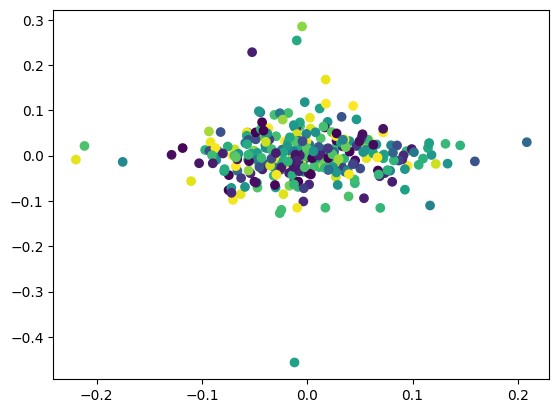

In [57]:
#skip
eig_vals, eig_vecs = np.linalg.eig(G)
print(np.all(np.linalg.eigvals(G) > 0))

sorted_indices = np.argsort(eig_vals)[::-1]
sorted_eigvecs = eig_vecs[:,sorted_indices]

top_2_eigvecs = sorted_eigvecs[:2].T
ddiag = np.sqrt(np.diag(eig_vals[:2]))

pp = top_2_eigvecs.dot(ddiag)



print(top_2_eigvecs)
first_comp = [top_2_eigvecs[i][0] for i in range(X.shape[0])]
second_comp = [top_2_eigvecs[i][1] for i in range(X.shape[0])]
plt.scatter(first_comp, second_comp, c=X[:,0])

In [17]:
J = np.eye(N)- 1/N * np.dot(np.ones(N),np.ones(N).T)
Gdelta = -1/2 * (J.dot(D)).dot(J)

eigval, eigvec = np.linalg.eig(Gdelta)

eigval[eigval<0] =0

sortedindices = np.argsort(eigval)[::-1]
sortedeigvecs = eigvec[:,sortedindices]

proj = sortedeigvecs[:2,]


first_comp = [proj[0][i] for i in range(N)]
second_comp = [proj[1][i] for i in range(N)]

plt.scatter(first_comp, second_comp, c =  X[:,0] )



LinAlgError: Array must not contain infs or NaNs

In [11]:
x = eigvec.T.dot(np.diag(np.sqrt(eigval)))

x.shape

(500, 500)